In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
iris.data, iris.target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [3]:
print(iris.data[0, :], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

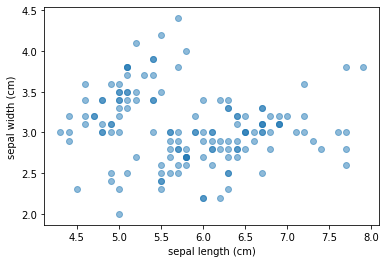

In [5]:
samples = iris.data
 
x = samples[:,0]
y = samples[:,1]
 
plt.scatter(x, y, alpha=0.5)
 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

# k-means Implementation

### Step 1

Place k random centroids for the initial clusters.

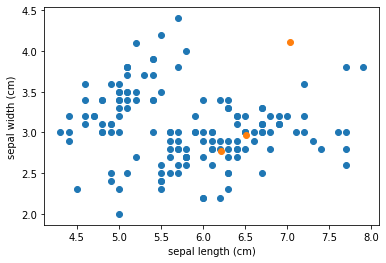

In [6]:
# Number of clusters
k=3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(np.min(x), np.max(x), k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(np.min(y), np.max(y), k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))
# Make a scatter plot of x, y
plt.scatter(x,y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)
# Display plot
plt.show()

In [7]:
centroids_x

array([7.03127019, 6.20873566, 6.51228043])

### Step 2

Assign data samples to the nearest centroid.

In [8]:
# Step 2: Assign samples to nearest centroid

# Distance formula
def distance(a,b):
  distance = 0
  for i,j in zip(a,b):
    distance += (i - j)**2
  return distance**0.5

# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(samples))

# A function that assigns the nearest centroid to a sample
def assign_to_centroid(sample, centroids):
  k = len(centroids)
  distances = np.zeros(k)
  for i in range(k):
    distances[i] = distance(sample, centroids[i])
  closest_centroid = np.argmin(distances)
  return closest_centroid
    

# Assign the nearest centroid to each sample
i = 0
for sample in samples:
  labels[i] = assign_to_centroid(sample, centroids)
  i+=1

# Print labels
print(labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 0. 2. 1. 2. 1. 1. 2. 2. 0. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 0. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


### Step 3

Update centroids based on the above-assigned data samples.

In [9]:
from copy import deepcopy

centroids_old = deepcopy(centroids)
sepal_length_width = np.array(list(zip(x, y)))

for i in range(k):
  points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
  centroids[i] = np.mean(points, axis = 0)

print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[7.03127019 4.11026095]
 [6.20873566 2.77381138]
 [6.51228043 2.96734627]]
- - - - - - - - - - - - - -
[[6.63333333 3.96666667]
 [5.43076923 3.00673077]
 [6.7975     3.0525    ]]


### Step 4

Repeat Steps 2 and 3 until convergence.

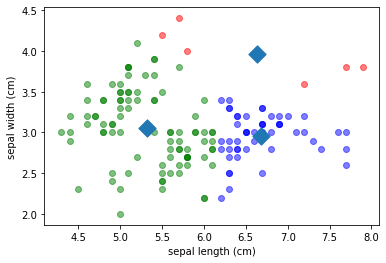

In [10]:
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(samples))

distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

  # Step 2: Assign samples to nearest centroid

  for i in range(len(samples)):
    labels[i] = assign_to_centroid(samples[i], centroids)

  # Step 3: Update centroids

  centroids_old = deepcopy(centroids)

  for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)
    error[i] = distance(centroids[i], centroids_old[i])

colors = ['r', 'g', 'b']

for i in range(k):
  points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
  plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

# Using sklearn

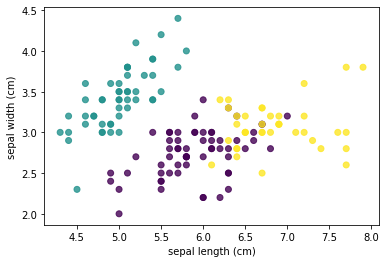

In [11]:
from sklearn.cluster import KMeans

k=3
model = KMeans(n_clusters = k)
model.fit(samples)
labels = model.predict(samples)

plt.scatter(x,y, c=labels, alpha = 0.8)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
 
plt.show()

# Evaluation

In [13]:
import pandas as pd

labels = [iris.target_names[s] for s in model.predict(samples)]

target = iris.target
species = [iris.target_names[t] for t in list(target)]

df = pd.DataFrame({'labels': labels, 'species': species})

print(df)

ct = pd.crosstab(df['labels'], df['species'])
print(ct)

         labels    species
0    versicolor     setosa
1    versicolor     setosa
2    versicolor     setosa
3    versicolor     setosa
4    versicolor     setosa
..          ...        ...
145   virginica  virginica
146      setosa  virginica
147   virginica  virginica
148   virginica  virginica
149      setosa  virginica

[150 rows x 2 columns]
species     setosa  versicolor  virginica
labels                                   
setosa           0          48         14
versicolor      50           0          0
virginica        0           2         36


In [14]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

new_labels = model.predict(new_samples)
 
print(new_labels)

new_names = [iris.target_names[label] for label in new_labels]
print(new_names)

[1 0 0]
['versicolor', 'setosa', 'setosa']


# Number of clusters

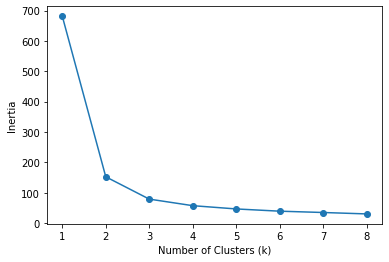

In [15]:
num_clusters = list(range(1,9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters = k)
  model.fit(samples)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()